In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [42]:
tf.__version__

'1.15.0'

In [43]:
from tensorflow.examples.tutorials.mnist import input_data

In [44]:
mnist = input_data.read_data_sets("D:/data/MNIST_DATA/" , one_hot=True)

Extracting D:/data/MNIST_DATA/train-images-idx3-ubyte.gz
Extracting D:/data/MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting D:/data/MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting D:/data/MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [45]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [46]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
mnist.train.images[0].shape

(784,)

In [48]:
mnist.train.images[0].reshape(28, 28, 1)

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [49]:
mnist.train.images[0].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

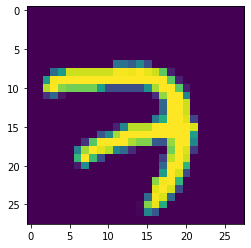

In [50]:
plt.imshow(mnist.train.images[0].reshape(28, 28))

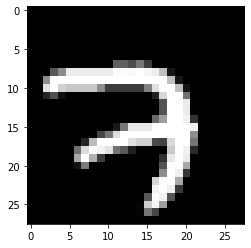

In [51]:
plt.imshow(mnist.train.images[0].reshape(28, 28),cmap = "gray")

In [52]:
def plot_image(num):
    plt.imshow(mnist.train.images[0].reshape(28, 28),cmap = "gray")
    print(mnist.train.labels[num])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


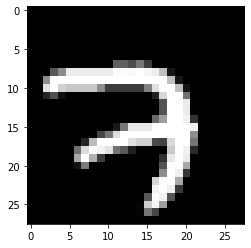

In [53]:
plot_image(599)

In [54]:
x = tf.placeholder(tf.float32, shape = ([None, 784]))
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [55]:
y = tf.nn.softmax(tf.matmul(x,w) + b)

In [56]:
y_a = tf.placeholder(tf.float32, shape = [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_a -tf.log(y), reduction_indices = [1]))

In [57]:
train_step = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cross_entropy)

In [63]:
sess = tf.InteractiveSession()

In [66]:
tf.global_variables_initializer().run()

In [69]:
for i in range(550):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_x, y_a: batch_y})

In [71]:
correct_predictions = tf.equal(tf.argmax(y_a,1), tf.argmax(y,1))

In [72]:
acc = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [73]:
sess.run(acc, feed_dict={x:mnist.test.images, y_a:mnist.test.labels})

0.098

In [74]:
w_n = sess.run(w)

In [75]:
w_n

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
b_n = sess.run(b)

In [77]:
b_n

array([-1.2293523e-06, -1.2293523e-06, -1.2293523e-06, -1.2293523e-06,
       -1.2293523e-06, -1.2293523e-06, -1.2293523e-06, -1.2293523e-06,
       -1.2293523e-06, -1.2293523e-06], dtype=float32)

In [78]:
sess.close()